In [1]:
import pandas as pd
import numpy as np
from IPython.display import display, Markdown

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

### Ознакомимся с данными

In [2]:
df = pd.read_csv('../testtask/ch_cost.csv', sep=";")
df.head()

,channel,cost_per_user
0,Ch_1,50
1,Ch_4,45
2,Ch_5,32
3,Ch_2,72
4,Ch_3,55


In [3]:
df1 = pd.read_csv('../testtask/data_app.csv', sep=";")
df1.head()

,fst_mnth,business_mnth,au,channel,rev
0,01.10.2018,01.10.2018,93766,Ch_1,"6310451,8"
1,01.10.2018,01.10.2018,81577,Ch_4,"4029903,8"
2,01.10.2018,01.10.2018,75867,Ch_5,"5517048,24"
3,01.10.2018,01.11.2018,64634,Ch_1,"4349868,2"
4,01.10.2018,01.11.2018,71896,Ch_4,"3551662,4"


Думаю, тут сразу лучше объединить таблицы

In [4]:
df_full = df1.merge(df, how='inner', on='channel')
df_full.head()

,fst_mnth,business_mnth,au,channel,rev,cost_per_user
0,01.10.2018,01.10.2018,93766,Ch_1,"6310451,8",50
1,01.10.2018,01.11.2018,64634,Ch_1,"4349868,2",50
2,01.10.2018,01.12.2018,55373,Ch_1,"3726602,9",50
3,01.10.2018,01.01.2019,49046,Ch_1,"3300795,8",50
4,01.11.2018,01.06.2019,39561,Ch_1,"2662455,3",50


In [5]:
df1.shape[0] == df_full.shape[0]

True

Количество строк в объединенной таблице сошлось с количеством строк из data_app, значит все хорошо)

In [6]:
#Проверим на пустые значения
df_full.isna().sum()

fst_mnth         0
business_mnth    0
au               0
channel          0
rev              0
cost_per_user    0
dtype: int64

In [7]:
df_full.dtypes

fst_mnth         object
business_mnth    object
au                int64
channel          object
rev              object
cost_per_user     int64
dtype: object

In [8]:
#меняем запятую на точку, чтоб преобразовать тип данных в float
df_full.rev = df_full.rev.apply(lambda x: x.replace(',','.'))
df_full.rev = df_full.rev.astype('float')

In [9]:
df_full.fst_mnth = pd.to_datetime(df_full.fst_mnth, format='%d.%m.%Y')
df_full.business_mnth = pd.to_datetime(df_full.business_mnth, format='%d.%m.%Y')

#### Задание
1. Нужно произвести оценку каналов привлечения с точки зрения качества привлекаемых пользователей. 
<br>Какие метрики Вы бы использовали? Какой канал привлечения следует развивать в первую очередь на ваш взгляд?
<br>На основании приложенных данных, сделайте необходимые расчеты.
2. На основании приложенных данных, оцените общую динамику развития продукта.

<br>Расшифровка данных:
<br>Fst_mnth – месяц, в котором пользователи впервые пришли в приложение (когорта пользователей)
<br>Business_mnth – отчетный месяц
<br>Au – активная аудитория приложения (уникальные пользователи) в отчетном месяце
<br>Channel – канал привлечения
<br>Rev –выручка в отчетном месяце по когорте пользователей
<br>В файле ch_cost - стоимость привлечения по каналам одного юзера

Буду использовать две метрики:
 - Посчитаю удержание клиентов из каждого канала
 - Посчитаю реальную стоимость клиента из каждого канала

Нужно посчитать retantion по каждому каналу

### сделаем расчет для Ch_1

In [10]:
df_ch1 = df_full.loc[df_full.channel == 'Ch_1'].copy()

In [11]:
#Для каждой строки посчитаем, сколько месяцев прошло с прихода первых пользователей и прибавим 1, чтоб получить индекс для когорты
df_ch1['lifetime'] = ((df_ch1.business_mnth - df_ch1.fst_mnth)/np.timedelta64(1, 'M')).round().astype(int) + 1

In [12]:
df_ch1['retention'] = (df_ch1['au'] / df_ch1.groupby('fst_mnth').transform('max')['au'])

In [13]:
df_ch1.fst_mnth = df_ch1.fst_mnth.dt.date

In [14]:
retantion_ch1 = df_ch1.pivot_table(index='fst_mnth', columns='lifetime', values='retention')

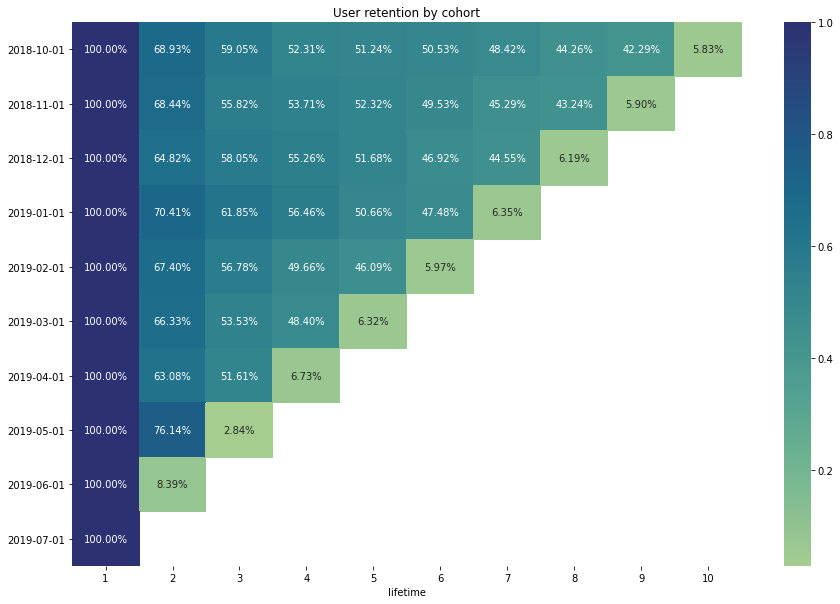

In [15]:
fig, ax = plt.subplots(figsize=(15,10)) 
sns.heatmap(
  retantion_ch1, 
  cmap='crest', 
  annot=True,
  annot_kws={"fontsize":10},
  fmt='.2%',
  ax=ax
  ).set_title("User retention by cohort")
plt.ylabel('')

plt.show()

---

### сделаем расчет для Ch_2

In [16]:
df_ch2 = df_full.loc[df_full.channel == 'Ch_2'].copy()

In [17]:
#Для каждой строки посчитаем, сколько месяцев прошло с прихода первых пользователей и прибавим 1, чтоб получить индекс для когорты
df_ch2['lifetime'] = ((df_ch2.business_mnth - df_ch2.fst_mnth)/np.timedelta64(1, 'M')).round().astype(int) + 1

In [18]:
df_ch2['retention'] = (df_ch2['au'] / df_ch2.groupby('fst_mnth').transform('max')['au'])

In [19]:
df_ch2.fst_mnth = df_ch2.fst_mnth.dt.date

In [20]:
retantion_ch2 = df_ch2.pivot_table(index='fst_mnth', columns='lifetime', values='retention')

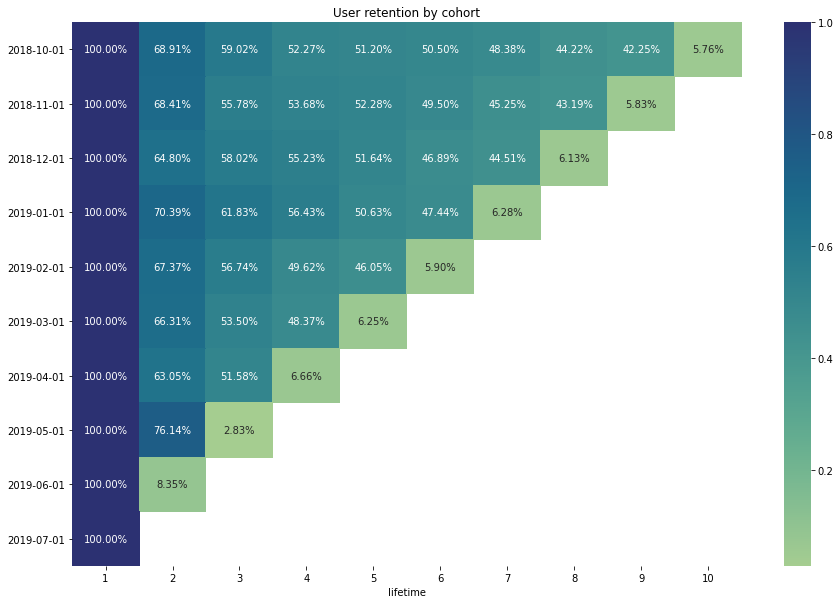

In [21]:
fig, ax = plt.subplots(figsize=(15,10)) 
sns.heatmap(
  retantion_ch2, 
  cmap='crest', 
  annot=True,
  annot_kws={"fontsize":10},
  fmt='.2%',
  ax=ax
  ).set_title("User retention by cohort")
plt.ylabel('')

plt.show()

---

### сделаем расчет для Ch_3

In [22]:
df_ch3 = df_full.loc[df_full.channel == 'Ch_3'].copy()

In [23]:
#Для каждой строки посчитаем, сколько месяцев прошло с прихода первых пользователей и прибавим 1, чтоб получить индекс для когорты
df_ch3['lifetime'] = ((df_ch3.business_mnth - df_ch3.fst_mnth)/np.timedelta64(1, 'M')).round().astype(int) + 1

In [24]:
df_ch3['retention'] = (df_ch3['au'] / df_ch3.groupby('fst_mnth').transform('max')['au'])

In [25]:
df_ch3.fst_mnth = df_ch3.fst_mnth.dt.date

In [26]:
retantion_ch3 = df_ch3.pivot_table(index='fst_mnth', columns='lifetime', values='retention')

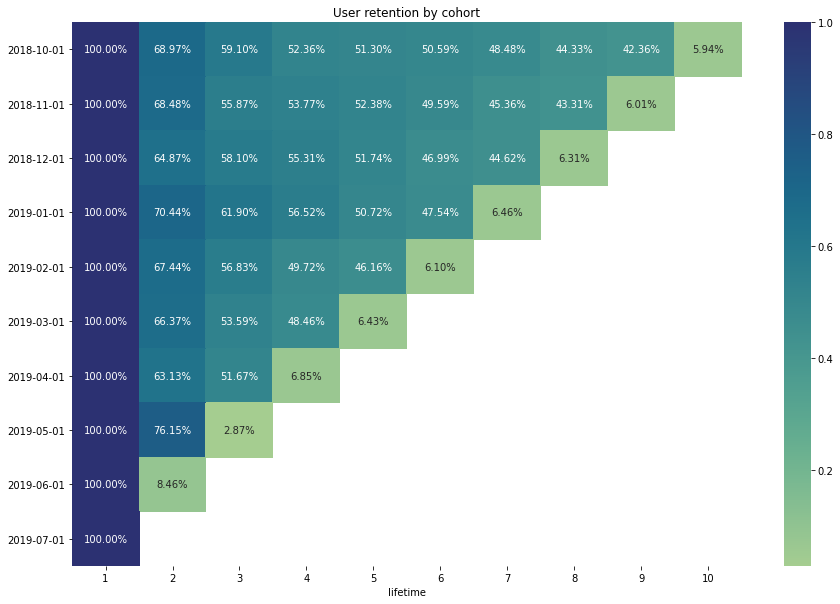

In [27]:
fig, ax = plt.subplots(figsize=(15,10)) 
sns.heatmap(
  retantion_ch3, 
  cmap='crest', 
  annot=True,
  annot_kws={"fontsize":10},
  fmt='.2%',
  ax=ax
  ).set_title("User retention by cohort")
plt.ylabel('')

plt.show()

---

### сделаем расчет для Ch_4

In [28]:
df_ch4 = df_full.loc[df_full.channel == 'Ch_4'].copy()

In [29]:
#Для каждой строки посчитаем, сколько месяцев прошло с прихода первых пользователей и прибавим 1, чтоб получить индекс для когорты
df_ch4['lifetime'] = ((df_ch4.business_mnth - df_ch4.fst_mnth)/np.timedelta64(1, 'M')).round().astype(int) + 1

In [30]:
df_ch4['retention'] = (df_ch4['au'] / df_ch4.groupby('fst_mnth').transform('max')['au'])

In [31]:
df_ch4.fst_mnth = df_ch4.fst_mnth.dt.date

In [32]:
retantion_ch4 = df_ch4.pivot_table(index='fst_mnth', columns='lifetime', values='retention')

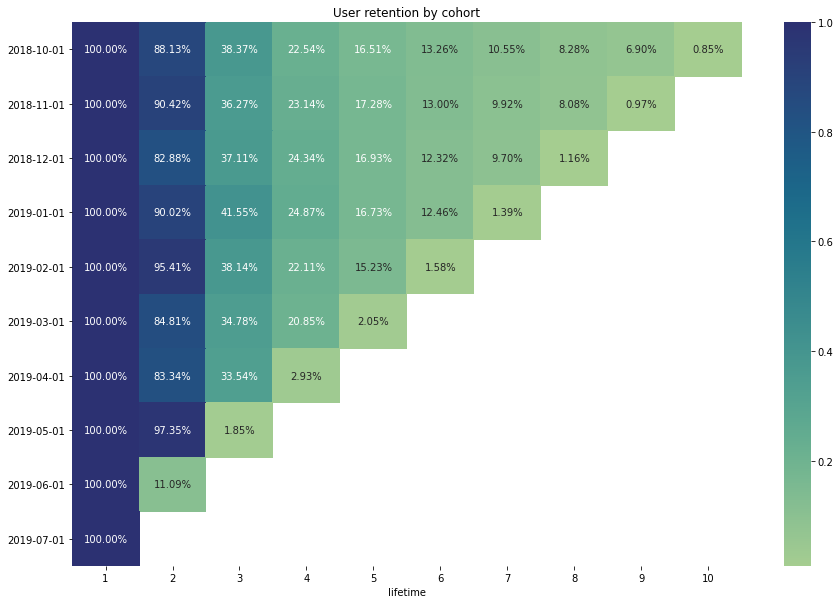

In [33]:
fig, ax = plt.subplots(figsize=(15,10)) 
sns.heatmap(
  retantion_ch4, 
  cmap='crest', 
  annot=True,
  annot_kws={"fontsize":10},
  fmt='.2%',
  ax=ax
  ).set_title("User retention by cohort")
plt.ylabel('')

plt.show()

---

### сделаем расчет для Ch_5

In [34]:
df_ch5 = df_full.loc[df_full.channel == 'Ch_5'].copy()

In [35]:
#Для каждой строки посчитаем, сколько месяцев прошло с прихода первых пользователей и прибавим 1, чтоб получить индекс для когорты
df_ch5['lifetime'] = ((df_ch5.business_mnth - df_ch5.fst_mnth)/np.timedelta64(1, 'M')).round().astype(int) + 1

In [36]:
#создадим новый датафрейм и туда поместим минимальный отчетный месяц по месяцу, 
#в котором пользователи впервые пришли в приложение, чтоб найти сколько пришло людей в самом начале
min_date = df_ch5.groupby('fst_mnth', as_index=False).business_mnth.min()

In [37]:
#присоединяем наших пользователей 
min_date = min_date.merge(df_ch5[['fst_mnth', 'business_mnth', 'au']], how='inner', on=['fst_mnth', 'business_mnth'])

In [38]:
min_date.rename(columns={'au':'max_au'}, inplace=True)

In [39]:
#присоединяем датафрейм с новыми людьми к датафрейму df_ch5, чтоб найти retantion
df_ch5 = df_ch5.merge(min_date[['fst_mnth', 'max_au']], how='inner', on='fst_mnth')

In [40]:
df_ch5['retention'] = (df_ch5['au'] / df_ch5['max_au'])

In [41]:
df_ch5.fst_mnth = df_ch5.fst_mnth.dt.date

In [42]:
retantion_ch5 = df_ch5.pivot_table(index='fst_mnth', columns='lifetime', values='retention')

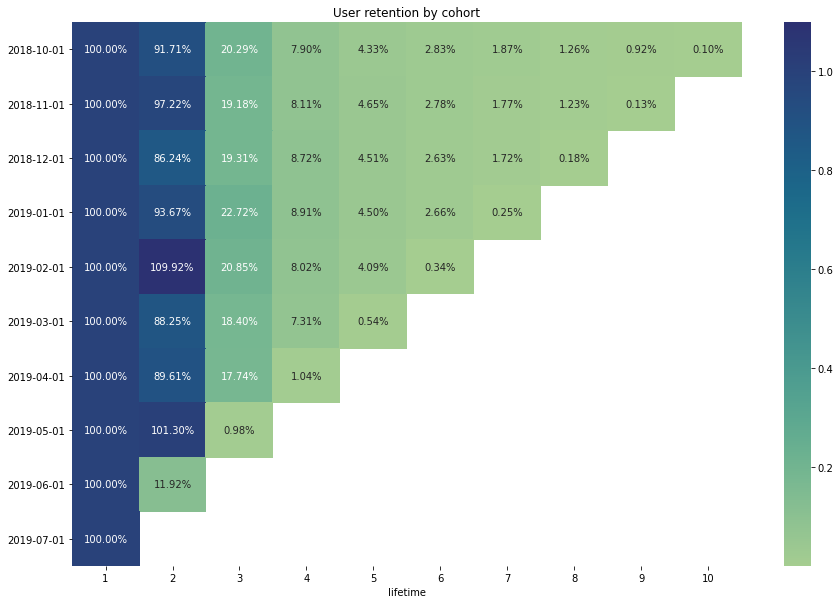

In [43]:
fig, ax = plt.subplots(figsize=(15,10)) 
sns.heatmap(
  retantion_ch5, 
  cmap='crest', 
  annot=True,
  annot_kws={"fontsize":10},
  fmt='.2%',
  ax=ax
  ).set_title("User retention by cohort")
plt.ylabel('')

plt.show()

In [44]:
df_ch5.query('fst_mnth == "2019-02-01"').sort_values(by='business_mnth')

,fst_mnth,business_mnth,au,channel,rev,cost_per_user,lifetime,max_au,retention


<span style="color:red">В 5 канале наблюдаем анамалию, почему-то пользователей на второй отчетный месяц больше, чем в первый</span>

Теперь добавим удержание людей по каждому каналу в общую табличку и построим график

In [45]:
data_prep = pd.DataFrame({
    'month': (retantion_ch1.mean()).index, 
    'ch1': (retantion_ch1.mean() * 100).values,
    'ch2': (retantion_ch2.mean() * 100).values,
    'ch3': (retantion_ch3.mean() * 100).values,
    'ch4': (retantion_ch4.mean() * 100).values,
    'ch5': (retantion_ch5.mean() * 100).values})
data_prep.head()

,month,ch1,ch2,ch3,ch4,ch5
0,1,100.000000,100.000000,100.000000,100.000000,100.000000
1,2,61.549747,61.525995,61.588764,80.383514,85.539617
2,3,49.942500,49.911753,49.992794,32.701275,17.432732
3,4,46.075831,46.035398,46.142083,20.111233,7.145863
4,5,43.052067,43.009889,43.120851,14.122251,3.770780


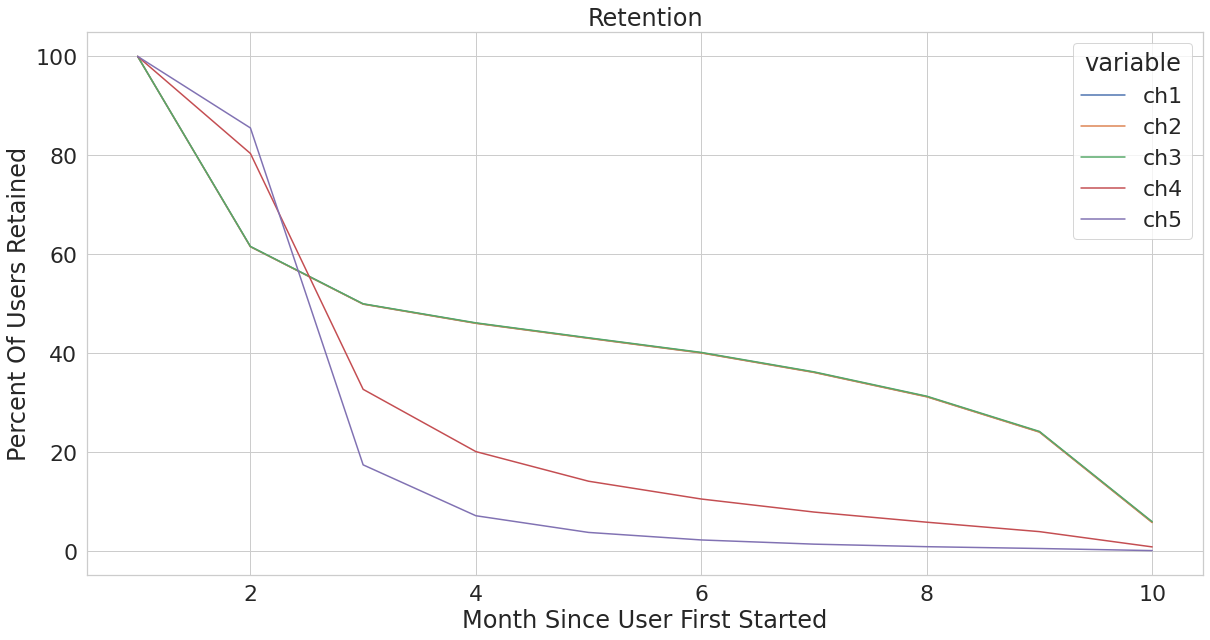

In [46]:
sns.set(
    font_scale=2,
    style="whitegrid",
    rc={'figure.figsize':(20,10)}
        )
sns.lineplot(x='month', y='value', hue='variable', 
             data=pd.melt(data_prep, ['month'])).set(xlabel='Month Since User First Started', 
    ylabel='Percent Of Users Retained', title="Retention")
plt.show()

<span style="color:red">мы видим только 3 оси, потому что в каналах с 1 по 3 одинаковые значения и произошло наложение</span>

In [47]:
display(Markdown("Теперь мы можем найти средний retention по каналам:"))
channels =['Ch_1', 'Ch_2', 'Ch_3', 'Ch_4', 'Ch_5']
counter = 0
for i in data_prep.loc[(data_prep['month']  > 6)][['ch1', 'ch2', 'ch3', 'ch4', 'ch5']].mean().round(2):
        print('В', channels[counter], 'средний retention с 7 по 10 месяц', i, end='')
        print('%')
        counter += 1

Теперь мы можем найти средний retention по каналам:

В Ch_1 средний retention с 7 по 10 месяц 24.33%
В Ch_2 средний retention с 7 по 10 месяц 24.27%
В Ch_3 средний retention с 7 по 10 месяц 24.42%
В Ch_4 средний retention с 7 по 10 месяц 4.63%
В Ch_5 средний retention с 7 по 10 месяц 0.73%


In [48]:
display(Markdown("Находим сумму затрат на каждый канал:"))
channels =['Ch_1', 'Ch_2', 'Ch_3', 'Ch_4', 'Ch_5']
counter = 0
for i, row in zip(df_full.query("fst_mnth == business_mnth").groupby('channel').cost_per_user.unique(), df_full.query("fst_mnth == business_mnth").groupby('channel')['au'].sum()):
    print('Сумма затрат в', channels[counter], '=', i[0] * row)
    counter += 1

Находим сумму затрат на каждый канал:

Сумма затрат в Ch_1 = 58860900
Сумма затрат в Ch_2 = 77086368
Сумма затрат в Ch_3 = 73040000
Сумма затрат в Ch_4 = 46088325
Сумма затрат в Ch_5 = 30479904


In [49]:
display(Markdown("Посчитаем сколько у нас осталось пользователей, умножив количество пользователей на средний retention:"))
counter = 0
for i, row in zip(df_full.query("fst_mnth == business_mnth").groupby('channel')['au'].sum(), (data_prep.melt(['month']).query('month > 6').groupby('variable').value.mean().values / 100)):
    print('Остаток пользователей в', channels[counter], '=', (i * row).round().astype(int))
    counter += 1

Посчитаем сколько у нас осталось пользователей, умножив количество пользователей на средний retention:

Остаток пользователей в Ch_1 = 286371
Остаток пользователей в Ch_2 = 259846
Остаток пользователей в Ch_3 = 324270
Остаток пользователей в Ch_4 = 47386
Остаток пользователей в Ch_5 = 6939


In [50]:
display(Markdown("Посчитаем реальную стоимость пользователя, разделив сумму затрат на остаток пользователей:"))
counter = 0
for i in (df_full.query("fst_mnth == business_mnth").groupby('channel')['au'].sum() * df_full.query("fst_mnth == business_mnth").groupby('channel').cost_per_user.unique())/(df_full.query("fst_mnth == business_mnth").groupby('channel')['au'].sum() * (data_prep.melt(['month']).query('month > 6').groupby('variable').value.mean().values / 100)):
    print('Реальная стоимость привлечения с', channels[counter], '=', i[0].round(2))
    counter += 1

Посчитаем реальную стоимость пользователя, разделив сумму затрат на остаток пользователей:

Реальная стоимость привлечения с Ch_1 = 205.54
Реальная стоимость привлечения с Ch_2 = 296.66
Реальная стоимость привлечения с Ch_3 = 225.24
Реальная стоимость привлечения с Ch_4 = 972.62
Реальная стоимость привлечения с Ch_5 = 4392.31


**Из всего этого можно сделать вывод, что самые качественные по удержанию пользователей каналы с 1 по 3. <br>В первую очередь стоит развивать 1 канал, т.к. с него самые дешевые клиенты, при этом стоимость из 2 и 3 каналов не сильно отличается**

---

### Посмотрим на общую динамику развития продукта

Найдем общий retention

In [51]:
df_full_retention = df_full.groupby(['fst_mnth', 'business_mnth'],as_index=False).agg({'au':'sum','rev':'sum', 'cost_per_user':'mean'})

In [52]:
df_full_retention.fst_mnth = pd.to_datetime(df_full_retention.fst_mnth, format='%Y-%m-%d')

In [53]:
df_full_retention['lifetime'] = ((df_full_retention.business_mnth - df_full_retention.fst_mnth)/np.timedelta64(1, 'M')).round().astype(int) + 1

In [54]:
df_full_retention['retention'] = (df_full_retention['au'] / df_full_retention.groupby('fst_mnth').transform('max')['au'])

In [55]:
df_full_retention.fst_mnth = df_full_retention.fst_mnth.dt.date

In [56]:
df_full_retention_chagort = df_full_retention.pivot_table(index='fst_mnth', columns='lifetime', values='retention')

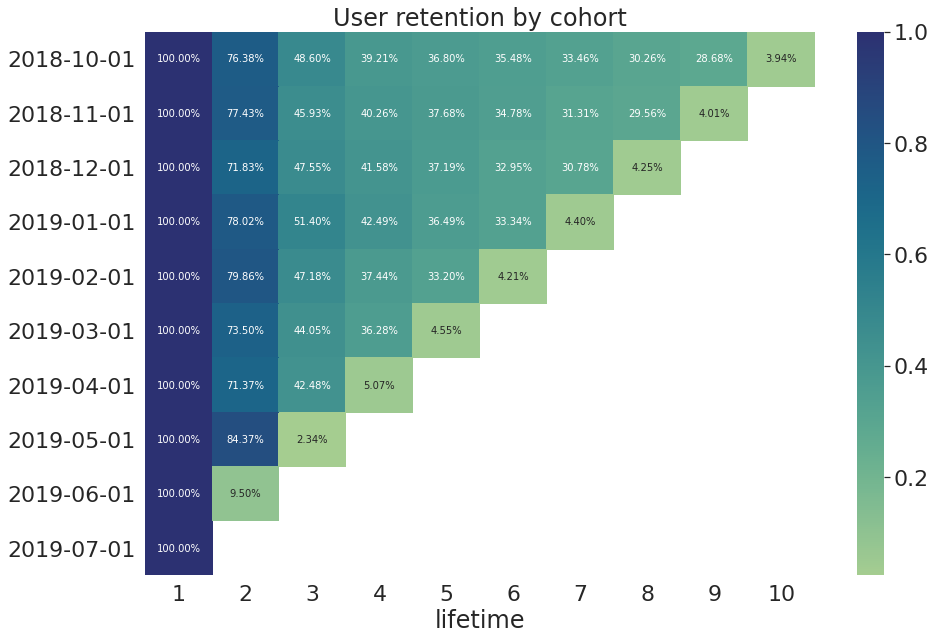

In [57]:
fig, ax = plt.subplots(figsize=(15,10)) 
sns.heatmap(
  df_full_retention.pivot_table(index='fst_mnth', columns='lifetime', values='retention'), 
  cmap='crest', 
  annot=True,
  annot_kws={"fontsize":10},
  fmt='.2%',
  ax=ax
  ).set_title("User retention by cohort")
plt.ylabel('')

plt.show()

In [58]:
data_prep_full = pd.DataFrame({
    'month': df_full_retention_chagort.mean().index, 
    'retention': (df_full_retention_chagort.mean() * 100).values})
data_prep_full.head()

,month,retention
0,1,100.000000
1,2,69.143606
2,3,41.191845
3,4,34.616807
4,5,30.986128


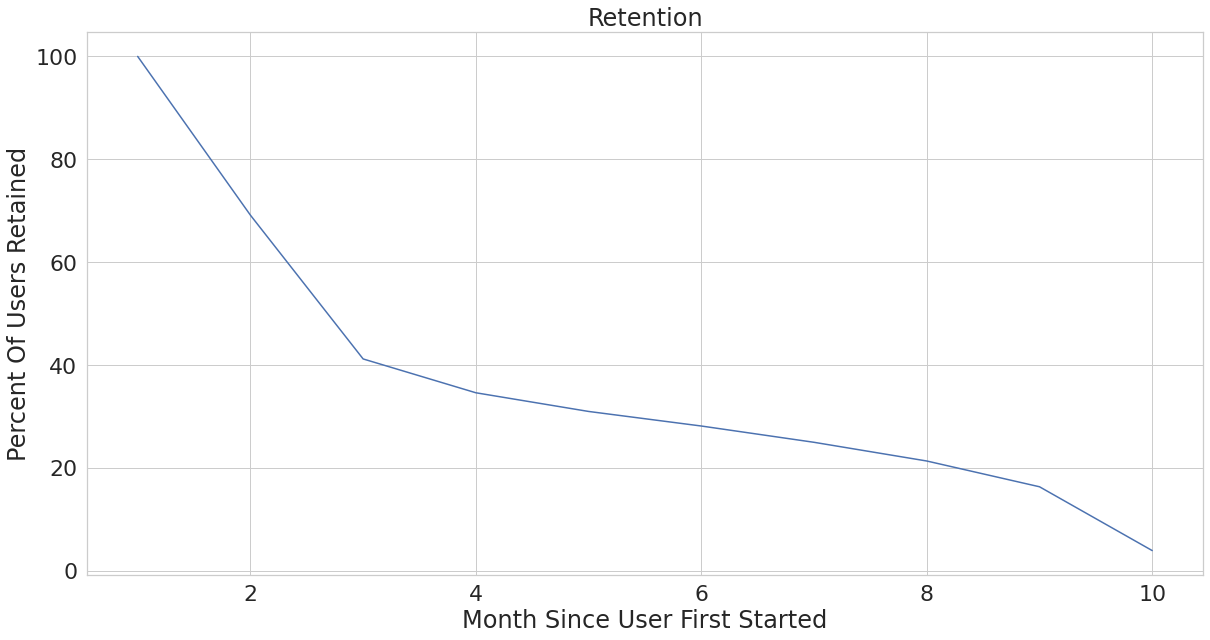

In [59]:
sns.set(
    font_scale=2,
    style="whitegrid",
    rc={'figure.figsize':(20,10)}
        )
sns.lineplot(x='month', y='value', 
             data=pd.melt(data_prep_full, ['month'])).set(xlabel='Month Since User First Started', 
    ylabel='Percent Of Users Retained', title="Retention")
plt.show()

Видим, что у нас retention не идет ровной полкой, а все падает и падает, возьмем средний с 4 по 8 месяц

In [60]:
display(Markdown("Теперь мы можем найти средний retention:"))
print('Средний retention с 7 по 10 месяц', data_prep_full.loc[(data_prep['month']  > 6)]['retention'].mean().round(2), end='')
print('%')

Теперь мы можем найти средний retention:

Средний retention с 7 по 10 месяц 16.66%


Посмотрим на количество людей, приходящих с рекламы по месяцам:

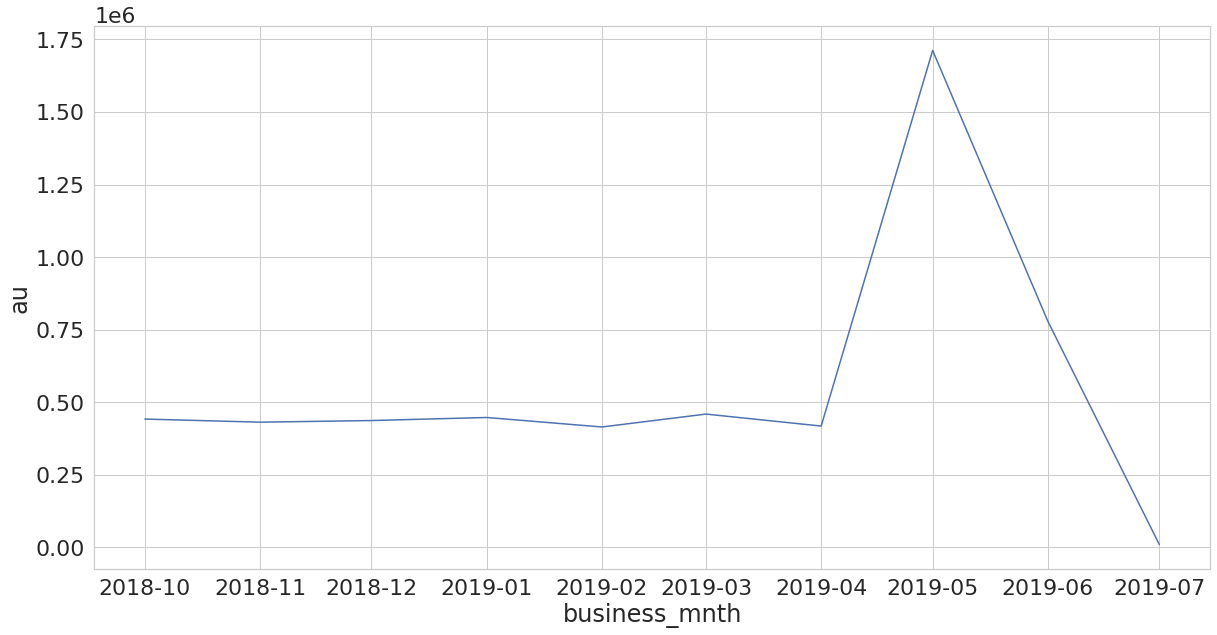

In [61]:
display(Markdown("Посмотрим на количество людей, приходящих с рекламы по месяцам:"))
sns.lineplot(data=df_full.query("fst_mnth == business_mnth").groupby(['fst_mnth', 'business_mnth'],as_index=False).au.sum(), x="business_mnth", y="au")

Изначально с октября 2018 года по май 2019 года идет ровный приход пользователей, затем идет резкий рост с мая 2019 по 
июнь 2019, а после вообще наблюдается, то что даже старые пользователи уходят

In [62]:
#посмотрим на медиану по новым пользователям (беру медиану, потому что есть выбросы)
df_full.query("fst_mnth == business_mnth").groupby(['fst_mnth', 'business_mnth'],as_index=False).au.sum()['au'].median()

439742.0

Посмотрим на сколько процентов отличаются наши месячные показатели новых пользователей от среднего

In [63]:
df_full_diff_median = df_full.copy()

In [64]:
df_full_diff_median.fst_mnth = df_full_diff_median.fst_mnth.dt.date

In [65]:
for i in df_full_diff_median.query("fst_mnth == business_mnth").groupby(['fst_mnth', 'business_mnth'],as_index=False).au.sum().iterrows():
    if i[1][2] > df_full_diff_median.query("fst_mnth == business_mnth").groupby(['fst_mnth', 'business_mnth'],as_index=False).au.sum()['au'].median():
        print(i[1][0], 'больше среднего на', (((i[1][2] - df_full_diff_median.query("fst_mnth == business_mnth").groupby(['fst_mnth', 'business_mnth'],as_index=False).au.sum()['au'].median())/df_full_diff_median.query("fst_mnth == business_mnth").groupby(['fst_mnth', 'business_mnth'],as_index=False).au.sum()['au'].median()) * 100).round(2), end='')
        print('%')
    elif i[1][2] < df_full_diff_median.query("fst_mnth == business_mnth").groupby(['fst_mnth', 'business_mnth'],as_index=False).au.sum()['au'].median():
        print(i[1][0], 'меньше среднего на', (((df_full_diff_median.query("fst_mnth == business_mnth").groupby(['fst_mnth', 'business_mnth'],as_index=False).au.sum()['au'].median() - i[1][2])/df_full_diff_median.query("fst_mnth == business_mnth").groupby(['fst_mnth', 'business_mnth'],as_index=False).au.sum()['au'].median()) * 100).round(2), end='')
        print('%')

2018-10-01 больше среднего на 0.58%
2018-11-01 меньше среднего на 1.85%
2018-12-01 меньше среднего на 0.58%
2019-01-01 больше среднего на 1.82%
2019-02-01 меньше среднего на 5.62%
2019-03-01 больше среднего на 4.48%
2019-04-01 меньше среднего на 4.9%
2019-05-01 больше среднего на 289.35%
2019-06-01 больше среднего на 77.16%
2019-07-01 меньше среднего на 97.75%


Как видим, в 5 месяце у нас рост пользователей на 289% от среднего, а в 6 и 7 падение на 77% и 97% от среднего

In [66]:
#посмотрим на Churn rate
data_prep_full_churn = pd.DataFrame({
    'month': df_full_retention_chagort.mean().index, 
    'retention': ((1 - df_full_retention_chagort.mean()) * 100).values})
data_prep_full_churn.head()

,month,retention
0,1,0.000000
1,2,30.856394
2,3,58.808155
3,4,65.383193
4,5,69.013872


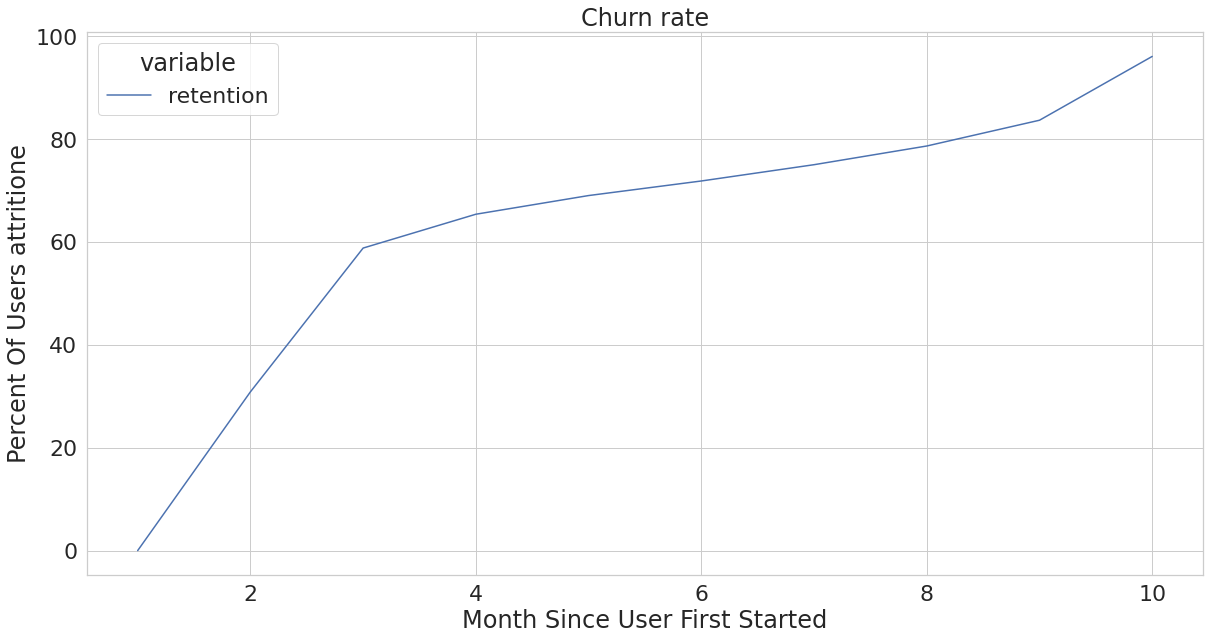

In [67]:
sns.set(
    font_scale=2,
    style="whitegrid",
    rc={'figure.figsize':(20,10)}
        )
sns.lineplot(x='month', y='value', hue='variable', 
             data=pd.melt(data_prep_full_churn, ['month'])).set(xlabel='Month Since User First Started', 
    ylabel='Percent Of Users attritione', title="Churn rate")
plt.show()

Возьмем среднее с 4 по 8 месяц, т.к. там более-менее плавная ось

In [68]:
display(Markdown("Теперь мы можем найти средний churn rate:"))
print('Средний churn rate с 7 по 10 месяц', data_prep_full_churn.loc[(data_prep_full_churn['month']  > 6)]['retention'].mean().round(2), end='')
print('%')

Теперь мы можем найти средний churn rate:

Средний churn rate с 7 по 10 месяц 83.34%


In [69]:
display(Markdown("Находим сумму затрат на рекламу:"))
df_full.query("fst_mnth == business_mnth").cost_per_user.mean() * df_full.query("fst_mnth == business_mnth")['au'].sum()

Находим сумму затрат на рекламу:

282069235.2

In [70]:
display(Markdown("Посчитаем сколько у нас осталось пользователей, умножив количество пользователей на средний retention:"))

(df_full.query("fst_mnth == business_mnth")['au'].sum() * (data_prep_full.loc[(data_prep_full['month']  > 6)]['retention'].mean() / 100)).round().astype(int)

Посчитаем сколько у нас осталось пользователей, умножив количество пользователей на средний retention:

924826

In [71]:
display(Markdown("Посчитаем реальную стоимость пользователя, разделив сумму затрат на остаток пользователей:"))
(df_full.query("fst_mnth == business_mnth").cost_per_user.mean() * df_full.query("fst_mnth == business_mnth")['au'].sum() / (df_full.query("fst_mnth == business_mnth")['au'].sum() * (data_prep_full.loc[(data_prep_full['month']  > 6)]['retention'].mean() / 100)).round().astype(int)).round(2)

Посчитаем реальную стоимость пользователя, разделив сумму затрат на остаток пользователей:

305.0

In [72]:
#посчитаем метрику ROI
print('Инвестиции окупились на', (((df_full.rev.sum() - 282069235.2) / 282069235.2) * 100).round(2), end='')
print('%')

Инвестиции окупились на 190.47%


In [86]:
#посчитаем траты на рекламу на пользователя
round((df_full.query("fst_mnth == business_mnth").au * df_full.query("fst_mnth == business_mnth").cost_per_user).sum() / df_full.query("fst_mnth == business_mnth").au.sum(), 2)

51.43

In [73]:
df_full.fst_mnth = df_full.fst_mnth.dt.date

Можем посмотреть LTV пользователей
<br>LTV = средняя выручка от клиента в месяц / churn rate.

In [74]:
display(Markdown("Найдем выручку от клиента:"))
(df_full.rev.mean() / df_full.au.mean()).round(2)

Найдем выручку от клиента:

57.66

In [75]:
display(Markdown("Средний churn rate:"))
print(data_prep_full_churn.loc[(data_prep_full_churn['month']  > 6)]['retention'].mean().round(2),'%')

Средний churn rate:

83.34 %


In [76]:
display(Markdown("LTV:"))

((((df_full.rev.mean() / df_full.au.mean()).round(2)) / data_prep_full_churn.loc[(data_prep_full_churn['month']  > 6)]['retention'].mean()) * 100).round(2)

LTV:

69.18

In [97]:
#на сколько LTV больше, чем траты на привлечения одного пользователя
print(round(((69.19 - 51.43) / 51.43) * 100, 2), end='')
print('%')

34.53%


Посмотрим доход по месяцам:

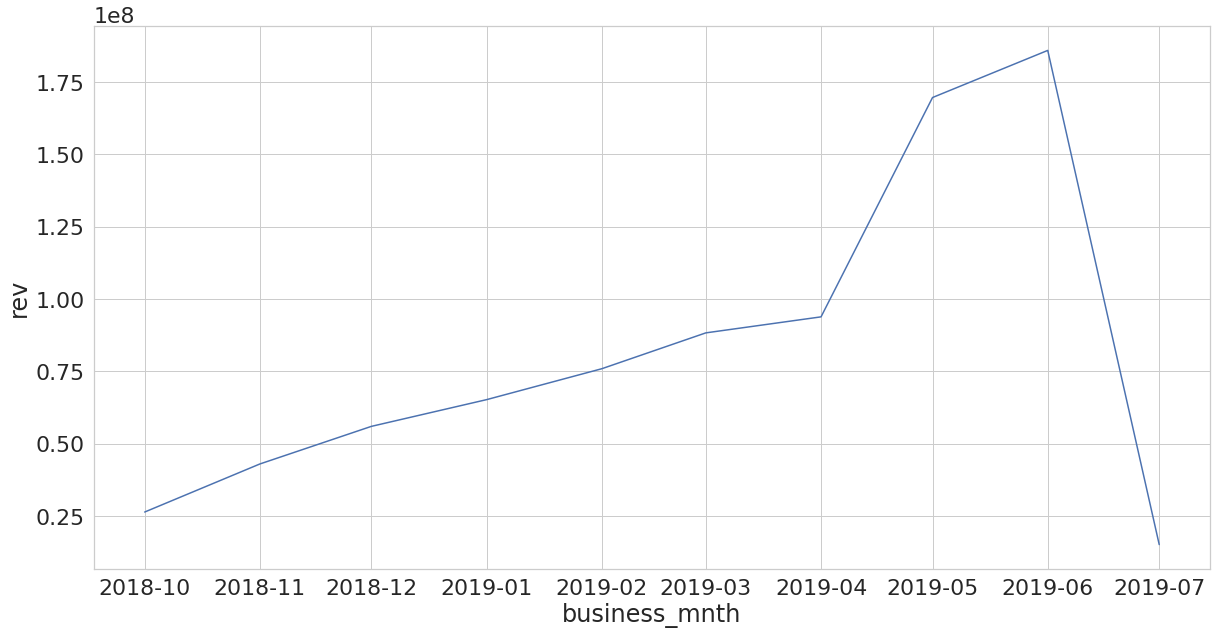

In [77]:
display(Markdown("Посмотрим доход по месяцам:"))
sns.lineplot(data=df_full.groupby('business_mnth').rev.sum())

Доход растет плавно с октября 2018 года до мая 2019 года, после в мае 2019 до июня 2019 очень большой рост дохода, а затем доход стримится к уровню
октября 2018 года

По графикам видно что резкий рост пользователей в мае 2019, по выручке резкий рост в мае и июне 2019, а потом яма. 
<br>То есть приложение привлекло новых пользователей и не то что не смогло их удержать, но и старые отвалились. 
<br>Тут возникают вопросы почему, возможно есть проблемы с масштабируемостью, возможно какие-то технические проблемы,
<br>возможно что-то еще 

<br>Инвестиции окупились на 190.47%
<br>Средний retention с 7 по 10 месяц 16.66%
<br>Средний churn rate с 7 по 10 месяц 83.34%
<br>Осталось 924826 пользователей после оттока
<br>Реальная стоимость пользователя 305.0
<br>Выручка от клиента: 57.66
<br>Траты на привлечения одного пользователя 51.43
<br>LTV: 69.19

Можем сказать, что продукт в плюсе, потому что LTV > Траты на привлечения одного пользователя на 34.53%